In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [3]:
def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def RxRy(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [10]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        entanglerCX(qc,i)
        RxRy(qc,i)
        #XY(qc,i)
    qc.measure_all
    return qc

In [11]:
def bench(simulator):
    i=2
    j=2
    depth=[]
    for i in range(2,7):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            execute(test_qc, simulator, shots=1000)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [12]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌──────────┐┌──────────┐                 ┌──────────┐┌──────────┐»
q_0: ──■──┤ RX(pi/3) ├┤ RY(pi/5) ├──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├»
     ┌─┴─┐└──────────┘├──────────┤┌──────────┐┌─┴─┐└──────────┘├──────────┤»
q_1: ┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├»
     └───┘   ┌─┴─┐    ├──────────┤├──────────┤└───┘   ┌─┴─┐    ├──────────┤»
q_2: ────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├»
             └───┘    └──────────┘└──────────┘        └───┘    └──────────┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«                      ┌──────────┐┌──────────┐            
«q_0: ──────────────■──┤ RX(pi/3) ├┤ RY(pi/5) ├────────────
«     ┌──────────┐┌─┴─┐└──────────┘├──────────┤┌──────────┐
«q_1: ┤ RY(pi/5) ├┤ X ├─────■──────┤ RX(pi/3) ├┤ RY(pi/5) ├
«     ├──────────┤└───┘   ┌─┴─┐    ├──────────┤├──────────┤
«q_2: ┤ RY(pi/5) ├────────┤ X ├────┤ RX(pi/3) ├┤ RY(pi/5) ├
«     └──────────┘        └───┘    └──────────┘└──────────┘
«c: 3/═════════════════════════════════════════════════════
«

In [13]:
from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
result = execute(qc, simulator2, shots=1024)
print(result)

{"steps": [{"index": 0, "gates": [{"name": "ctrl-pauli-x", "control": 0, "target": 1}]}, {"index": 1, "gates": [{"name": "rx-phi", "target": 0, "phi": 1.0471975511965976}]}, {"index": 2, "gates": [{"name": "ry-phi", "target": 0, "phi": 0.6283185307179586}]}, {"index": 3, "gates": [{"name": "ctrl-pauli-x", "control": 1, "target": 2}]}, {"index": 4, "gates": [{"name": "rx-phi", "target": 1, "phi": 1.0471975511965976}]}, {"index": 5, "gates": [{"name": "ry-phi", "target": 1, "phi": 0.6283185307179586}]}, {"index": 6, "gates": [{"name": "ctrl-pauli-x", "control": 0, "target": 1}]}, {"index": 7, "gates": [{"name": "rx-phi", "target": 0, "phi": 1.0471975511965976}]}, {"index": 8, "gates": [{"name": "ry-phi", "target": 0, "phi": 0.6283185307179586}]}, {"index": 9, "gates": [{"name": "rx-phi", "target": 2, "phi": 1.0471975511965976}]}, {"index": 10, "gates": [{"name": "ry-phi", "target": 2, "phi": 0.6283185307179586}]}, {"index": 11, "gates": [{"name": "ctrl-pauli-x", "control": 1, "target": 2

In [14]:
simulator=Aer.get_backend('qasm_simulator')
depth=bench(simulator)
print(depth)

[100, 100, 100, 100, 100]


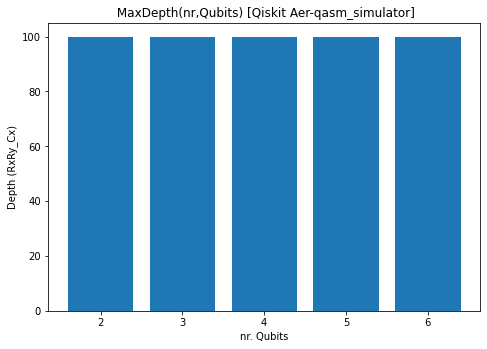

In [16]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,7)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [17]:
from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
depth2=bench(simulator2)
print(depth2)

[100, 100, 100, 80, 22]


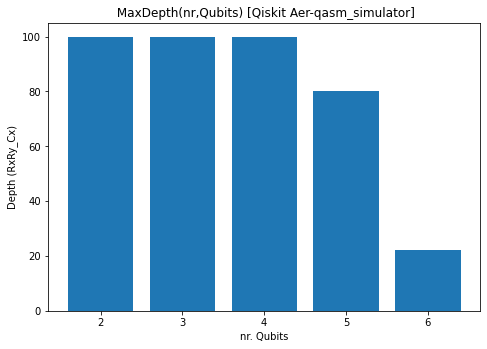

In [18]:
simulator_name2='Moara simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,7)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()